# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        self.std=np.std(X,axis=0)

    def transform(self, X):
        return (X-self.mean)/self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [25]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda
        self.weights=None
        self.bias=None
        self.loss_history=[]

    def fit(self, X, y):
        n_samples, n_features=X.shape
        self.weights=np.zeros(n_features) #Sets weights to 0
        self.bias=0 #Sets bias to 0

        for i in range(self.epochs):
            y_predicted=np.dot(X,self.weights)+self.bias #Linear prediction

            mse_loss=np.mean((y - y_predicted)**2) #Computes loss
            l2_penalty=self.l2_lambda*np.sum(self.weights**2) #Applying L2 regularisation
            self.loss_history.append(mse_loss+l2_penalty)

            dw=(1/n_samples)*(2*np.dot(X.T,(y_predicted-y))+2*self.l2_lambda*self.weights) #Derivation of weights
            db=(1/n_samples)*2*np.sum(y_predicted-y) #Derivatives of bias

            self.weights-=self.lr*dw #Updates weights
            self.bias-=self.lr*db #Updates bias

    def predict(self, X):
        return np.dot(X, self.weights)+self.bias #Returns prediction

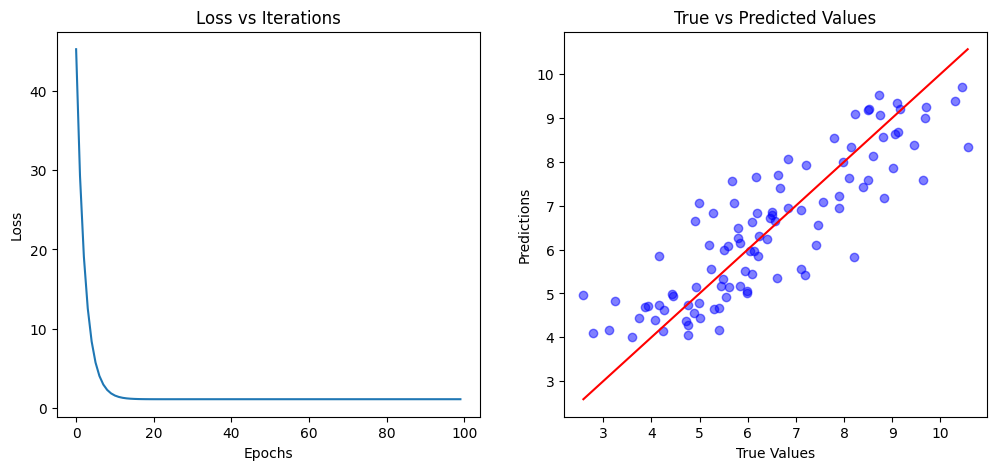

In [27]:
X=2*np.random.rand(100, 1) #Generating random values of X
y=4+3*X.flatten()+np.random.randn(100) #Generating values of y from the X

scaler=StandardScalerManual() #Scaling data from the above functions
X_scaled=scaler.fit_transform(X)

model=LinearRegressionManual(lr=0.1,epochs=100,l2_lambda=0.1) #Training our model using the above functions
model.fit(X_scaled,y)
predictions=model.predict(X_scaled)
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(model.loss_history) #Plots losses vs iterations
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(y, predictions, color='blue', alpha=0.5) #Plots true vs predicted values
plt.plot([min(y),max(y)],[min(y),max(y)],color='red') #Diagonal line
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.

In [28]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z=np.clip(z,-500,500) #Clips values to avoid overflow in the exp function
    return 1/(1+np.exp(-z)) #From definition of sigmoid function

In [29]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda
        self.weights=None
        self.bias=None
        self.loss_history=[]

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features) #sets weights to 0
        self.bias=0 #Sets bias to 0

        for i in range(self.epochs):
            linear_model=np.dot(X, self.weights) + self.bias #Linear model
            y_predicted=sigmoid(linear_model) #Applying sigmoid function of the linear model

            epsilon=1e-15
            loss=-np.mean(y*np.log(y_predicted+epsilon)+(1-y)*np.log(1-y_predicted+epsilon)) #binary cross entropy loss
            l2_penalty=self.l2_lambda*np.sum(self.weights**2) #L2 penalty
            self.loss_history.append(loss+l2_penalty)

            dw=(1/n_samples)*(np.dot(X.T,(y_predicted-y))+(2*self.l2_lambda*self.weights)) #Derivative of weight
            db = (1/n_samples)*np.sum(y_predicted-y) #Derivative of bias

            self.weights-=self.lr*dw #Updates weights
            self.bias-=self.lr*db #Updates bias

    def predict_proba(self,X):
        linear_model=np.dot(X,self.weights)+self.bias
        return sigmoid(linear_model) #Returns exact values of probability

    def predict(self, X):
        y_predicted_proba=self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_predicted_proba] #Gives either 0 or 1 depending on value

Final Accuracy:100.0%


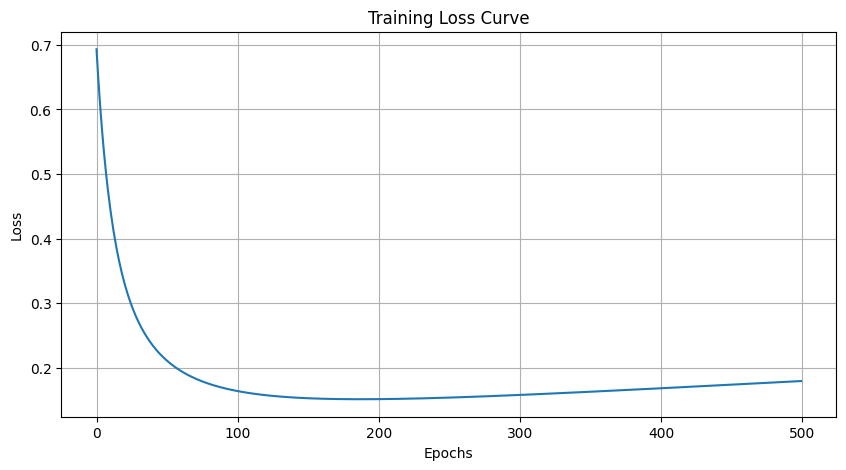

In [30]:
np.random.seed(42)
class_0=np.random.randn(50,2)+np.array([1, 1])
class_1=np.random.randn(50,2)+np.array([4, 4])

X = np.vstack((class_0, class_1))
y = np.array([0]*50+[1]*50)
scaler = StandardScalerManual() #Scaling data from above functions
X_scaled = scaler.fit_transform(X)

model=LogisticRegressionManual(lr=0.1,epochs=500,l2_lambda=0.01) #Training our model from the above functions
model.fit(X_scaled,y)

predictions=model.predict(X_scaled)
accuracy=np.mean(predictions==y)
print(f"Final Accuracy:{accuracy*100}%")

plt.figure(figsize=(10,5))
plt.plot(model.loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.

In [31]:
from sklearn.cluster import KMeans

def kmeans_matrix_sklearn(M, k):
    '''
    Uses scikit-learn to cluster individual elements of a matrix M.
    Returns:
    assignment_table: Matrix of labels with same shape as M
    cookbook: dict mapping cluster_id to list of (i, j) coordinates
    centroids: 1D array of cluster mean values
    '''
    n,m=M.shape
    flat_M=M.reshape(-1, 1)
    kmeans=KMeans(n_clusters=k,random_state=42,n_init='auto')
    kmeans.fit(flat_M)
    labels=kmeans.labels_
    assignment_table=labels.reshape(n, m)
    centroids=kmeans.cluster_centers_.flatten() #Finding our cluster centres

    # Step 5: Construct the Cookbook
    # Maps each cluster index to the (i, j) coordinates of its members
    cookbook = {cluster_id: [] for cluster_id in range(k)}
    for i in range(n):
        for j in range(m):
            label = assignment_table[i, j]
            cookbook[label].append((i, j))

    return assignment_table,cookbook,centroids

matrix_M=np.random.randint(0,100,(4,4)) #Creates a random matrix

k_val = 3
table,book,final_centers=kmeans_matrix_sklearn(matrix_M,k_val)

print("Original matrix M\n")
print(matrix_M)

print("Final Centroids(Cluster Centers)\n")
print(final_centers)

print("Assignment Table(Cluster Labels)\n")
print(table)

print("Cookbook(Cluster ID:List of Coordinates)")
for cluster_id,coords in book.items():
    print(f"Cluster{cluster_id} (Center={final_centers[cluster_id]:.2f}):{coords}")

Original matrix M

[[ 1 89 16 32]
 [ 8 42 47 38]
 [92 41 25 98]
 [49 24 23 12]]
Final Centroids(Cluster Centers)

[35.66666667 93.          9.25      ]
Assignment Table(Cluster Labels)

[[2 1 2 0]
 [2 0 0 0]
 [1 0 0 1]
 [0 0 0 2]]
Cookbook(Cluster ID:List of Coordinates)
Cluster0 (Center=35.67):[(0, 3), (1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
Cluster1 (Center=93.00):[(0, 1), (2, 0), (2, 3)]
Cluster2 (Center=9.25):[(0, 0), (0, 2), (1, 0), (3, 3)]
